The package has multiple varieties of Smoothed Particle Hydrodynamics (SPH) implemented, such as Total Lagrangian SPH, Weakly Compressible SPH, Implicity Incompressible SPH, Entropically Damped SPH, and they have implemented Discrete Element Methods (DEM) as well, which is used for more rigid body simulations, and they have pre-made examples that are available to run as well. These methods are all unique in that they don't require a mesh/grid like other physics simulations and model the entire simulation as discrete particles that can move in any 3d direction. Some canonical examples of things you can model with PSH are: a wave, a dam breaking, or water spheres (droplets) crashing to the ground. Each of the simulation methods mentioned above function slightly differently, and with different assumptions, but work at a high level by providing an initial representation of the problem and boundary, including resolution (# of particles) and time, and then 'integrating' over time steps where at each time step it is solving some sort of equation, either a linear system of equations or an ODE or PDE

In [1]:
import Pkg
Pkg.add("TrixiParticles")
Pkg.add("OrdinaryDiffEq")
using TrixiParticles

    Updating registry at `C:\Users\jelly\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ✓ PDMats → StatsBaseExt
  ✓ KernelAbstractions → EnzymeExt
  ✓ FiniteDiff
  ✓ Interpolations
  ✓ StructArrays → StructArraysGPUArraysCoreExt
  ✓ FastPower → FastPowerForwardDiffExt
  ✓ MaybeInplace
  ✓ FastGaussQuadrature
  ✓ DifferentiationInterface → DifferentiationInterfaceForwardDiffExt
  ✓ SymbolicIndexingInterface → SymbolicIndexingInterfacePrettyTablesExt
  ✓ LoopVectorization → SpecialFunctionsExt
  ✓ IntervalArithmetic → IntervalArithmeticForwardDiffExt
  ✓ Plots → FileIOExt
  ✓ PointNeighbors
  ✓ FiniteDiff → FiniteDiffStaticArraysExt
  ✓ MaybeInplace → MaybeInplaceSparseArraysExt
  ✓ Interpolations → InterpolationsForwardDiffExt
  ✓ DifferentiationInterface → DifferentiationInterfaceFiniteDiffExt
  ✓ Lo

In [2]:
trixi_include(joinpath(examples_dir(), "fluid", "hydrostatic_water_column_2d.jl"))


████████╗██████╗ ██╗██╗  ██╗██╗██████╗  █████╗ ██████╗ ████████╗██╗ ██████╗██╗     ███████╗███████╗
╚══██╔══╝██╔══██╗██║╚██╗██╔╝██║██╔══██╗██╔══██╗██╔══██╗╚══██╔══╝██║██╔════╝██║     ██╔════╝██╔════╝
   ██║   ██████╔╝██║ ╚███╔╝ ██║██████╔╝███████║██████╔╝   ██║   ██║██║     ██║     █████╗  ███████╗
   ██║   ██╔══██╗██║ ██╔██╗ ██║██╔═══╝ ██╔══██║██╔══██╗   ██║   ██║██║     ██║     ██╔══╝  ╚════██║
   ██║   ██║  ██║██║██╔╝ ██╗██║██║     ██║  ██║██║  ██║   ██║   ██║╚██████╗███████╗███████╗███████║
   ╚═╝   ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝╚═╝     ╚═╝  ╚═╝╚═╝  ╚═╝   ╚═╝   ╚═╝ ╚═════╝╚══════╝╚══════╝╚══════╝


┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Semidiscretization                                                                               │
│ ══════════════════                                                                               │

┌ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.
└ @ TrixiBase C:\Users\jelly\.julia\packages\TrixiBase\38UFo\src\trixi_include.jl:50



│ #spatial dimensions: ………………………… 2                                                                │
│ #systems: ……………………………………………………… 2                                                                │
│ neighborhood search: ………………………… GridNeighborhoodSearch                                           │
│ total #particles: ………………………………… 636                                                              │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ WeaklyCompressibleSPHSystem{2}                                                                   │
│ ══════════════════════════════                                                                   │
│ #particles: ………………………………………………… 360                                                              │
│ density calculator: …………………………… ContinuityDensity                                      

retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
 0.0
 1.0
u: 2-element Vector{RecursiveArrayTools.ArrayPartition{Float64, Tuple{TrixiParticles.ThreadedBroadcastArray{Float64, 1, Vector{Float64}, PolyesterBackend}, TrixiParticles.ThreadedBroadcastArray{Float64, 1, Vector{Float64}, PolyesterBackend}}}}:
 ([0.0, 0.0, 1071.573708642796, 0.0, 0.0, 1071.573708642796, 0.0, 0.0, 1071.573708642796, 0.0  …  1002.4346451759078, 0.0, 0.0, 1002.4346451759078, 0.0, 0.0, 1002.4346451759078, 0.0, 0.0, 1002.4346451759078], [0.025, 0.025, 0.07500000000000001, 0.025, 0.125, 0.025, 0.17500000000000002, 0.025, 0.225, 0.025  …  0.775, 0.875, 0.8250000000000001, 0.875, 0.875, 0.875, 0.925, 0.875, 0.9750000000000001, 0.875])
 ([-0.020092234468816198, -0.007008851695384498, 1076.694747627519, -0.012355482958261964, -0.01267694161316778, 1074.9295673991755, -0.010434256056925884, 0.005038228135711676, 1073.8898858270686, -0.01098611017178379  …  1003.7686218234634, -0.007820302080

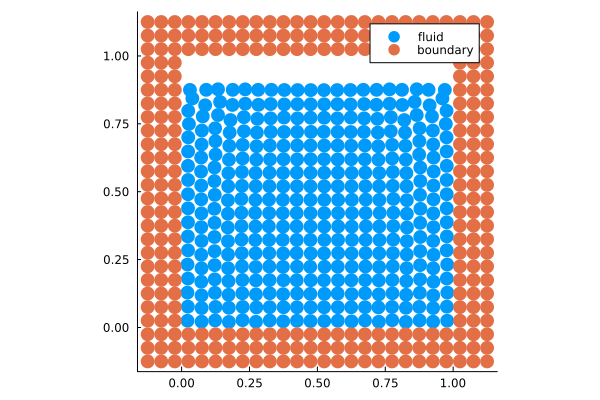

In [3]:
using Plots; plot(sol)

In [4]:
include(joinpath(examples_dir(), "fluid", "dam_break_2d.jl"))


████████╗██████╗ ██╗██╗  ██╗██╗██████╗  █████╗ ██████╗ ████████╗██╗ ██████╗██╗     ███████╗███████╗
╚══██╔══╝██╔══██╗██║╚██╗██╔╝██║██╔══██╗██╔══██╗██╔══██╗╚══██╔══╝██║██╔════╝██║     ██╔════╝██╔════╝
   ██║   ██████╔╝██║ ╚███╔╝ ██║██████╔╝███████║██████╔╝   ██║   ██║██║     ██║     █████╗  ███████╗
   ██║   ██╔══██╗██║ ██╔██╗ ██║██╔═══╝ ██╔══██║██╔══██╗   ██║   ██║██║     ██║     ██╔══╝  ╚════██║
   ██║   ██║  ██║██║██╔╝ ██╗██║██║     ██║  ██║██║  ██║   ██║   ██║╚██████╗███████╗███████╗███████║
   ╚═╝   ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝╚═╝     ╚═╝  ╚═╝╚═╝  ╚═╝   ╚═╝   ╚═╝ ╚═════╝╚══════╝╚══════╝╚══════╝


┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Semidiscretization                                                                               │
│ ══════════════════                                                                               │
│ #spatial dimensions: ………………………… 2                                                           

┌ Info: The desired tank length in y-direction 4.0 is not a multiple of the particle spacing 0.015.
│ New tank length in y-direction is set to 4.005.
└ @ TrixiParticles C:\Users\jelly\.julia\packages\TrixiParticles\EgHjE\src\setups\rectangular_tank.jl:195



│ boundary model: ……………………………………… BoundaryModelDummyParticles(AdamiPressureExtrapolation, Nothing) │
│ movement function: ……………………………… nothing                                                          │
│ adhesion coefficient: ……………………… 0.0                                                              │
│ color: ……………………………………………………………… 0                                                                │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SolutionSavingCallback                                                                           │
│ ══════════════════════                                                                           │
│ dt: ……………………………………………………………………… 0.02                                                             │
│ custom quantities: ……………………………… nothing                                                

retcode: Success
Interpolation: 1st order linear
t: 13-element Vector{Float64}:
 0.0
 0.0
 0.371
 0.371
 0.584
 0.584
 0.743
 0.743
 1.411
 1.411
 1.597
 1.597
 1.8198699419201876
u: 13-element Vector{RecursiveArrayTools.ArrayPartition{Float64, Tuple{TrixiParticles.ThreadedBroadcastArray{Float64, 1, Vector{Float64}, PolyesterBackend}, TrixiParticles.ThreadedBroadcastArray{Float64, 1, Vector{Float64}, PolyesterBackend}}}}:
 ([0.0, 0.0, 1002.4717230261056, 0.0, 0.0, 1002.4717230261056, 0.0, 0.0, 1002.4717230261056, 0.0  …  1000.0312499999999, 0.0, 0.0, 1000.0312499999999, 0.0, 0.0, 1000.0312499999999, 0.0, 0.0, 1000.0312499999999], [0.0075, 0.0075, 0.0225, 0.0075, 0.0375, 0.0075, 0.0525, 0.0075, 0.0675, 0.0075  …  1.1325, 0.5925, 1.1475, 0.5925, 1.1624999999999999, 0.5925, 1.1775, 0.5925, 1.1925, 0.5925])
 ([0.0, 0.0, 1002.4717230261056, 0.0, 0.0, 1002.4717230261056, 0.0, 0.0, 1002.4717230261056, 0.0  …  1000.0312499999999, 0.0, 0.0, 1000.0312499999999, 0.0, 0.0, 1000.0312499999999, 0.0,

A question I have is: how hard would it be to build my own simulation, using an stl input file if needed, per docs, to represent some sort of fluid boundary problem, like water flowing out of a fire hydrant over time, or a giant wave, and how would the different methods compare in terms of performance?

I also wonder, are these things deterministic? I think so with a given input state, but not certain.


A proposed experiment I have is to devise a simple physics phenomenon that we can model with various solvers implemented by this package, and compare results and performance, and hopefully get a neat visualization!

In [5]:
Pkg.add("VideoIO")
Pkg.add("GLMakie")
using GLMakie
using VideoIO

   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jelly\.julia\environments\v1.10\Manifest.toml`


In [20]:
using IJulia

# Display the video inline
IJulia.display("text/html", """
<video width="640" height="532" autoplay loop controls>
  <source src="out/testing_3.mp4" type="video/mp4">
</video>
""")
